<a href="https://colab.research.google.com/github/caohungphu/CS114.L21/blob/main/Colab/Recognizing_hand_written_digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align="center"><b>CS114.L21 - MÁY HỌC - MACHINE LEARNING</b></h1>
<h1 align="center"><b>BÀI TẬP COLAB SỐ 01 (12/04/2021)</b></h1>

## **1. YÊU CẦU:**
- **Yêu cầu code**: tạo một notebook colab với các đoạn code và chú thích cần thiết để thực hiện công việc sau:
    + Train model cho bài toán hand-written digits recognition theo example của sklearn: https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html#sphx-glr-auto-examples-classification-plot-digits-classification-py
    + Truy cập webcam của máy tính từ colab.
    + Chụp ảnh một tờ giấy đang được giơ ra trước webcam
    + Nhận dạng xem chữ số đang viết trên tờ giấy là số mấy.

- **Yêu cầu phân tích**: Thông qua thực nghiệm chạy thử nhiều lần trả lời các câu hỏi sau
    + Kết quả chạy thực tế với webcam của laptop và giấy viết tay của các bạn có tốt không?
    + Nhìn vào đâu để kết luận là tốt hay không?
    + Nếu không tốt thì lý do tại sao?
    + Nếu tốt thì tiếp theo có thể dùng model digits recognition này vào các bài toán phức tạp hơn như nhận dạng biển số nhà không?




## **2. NHÓM THỰC HIỆN**
- Cao Hưng Phú - 19520214 - 19520214@gm.uit.edu.vn
- Nguyễn Thành Công - 19521294 - 19521294@gm.uit.edu.vn
- Trần Huỳnh Kỳ Anh - 19521216 - 19521216@gm.uit.edu.vn

## **3. LINK GITHUB**
- Link GitHub nhóm: https://github.com/caohungphu/CS114.L21/
- Link GitHub bài làm: [Recognizing_hand-written_digits.ipynb](https://github.com/caohungphu/CS114.L21/blob/main/Colab/Recognizing_hand_written_digits.ipynb)

## **4. SOURCE CODE**

### **4.1. Nguồn tham khảo**
- Dataset, training: https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html#sphx-glr-auto-examples-classification-plot-digits-classification-py
- SVC Parameters: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
- Image Thresholding (Ostu's Method): https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_thresholding/py_thresholding.html
- Camera Capture: [Google Colab](https://colab.research.google.com/#snippetFileIds=%2Fv2%2Fexternal%2Fnotebooks%2Fsnippets%2Fadvanced_outputs.ipynb&snippetQuery=Camera%20Capture)
- ImageOps: https://pillow.readthedocs.io/en/3.0.x/reference/ImageOps.html

### **4.2. Code**

#### **4.2.1. Thêm thư viện, kiểm tra và tiền xử lý dữ liệu**

In [1]:
# Author: Gael Varoquaux <gael dot varoquaux at normalesup dot org>
# License: BSD 3 clause

# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

# Numpy
import numpy as np

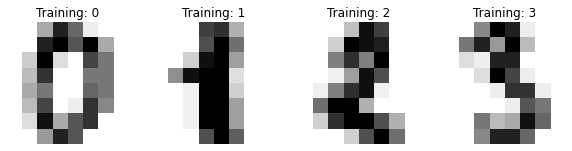

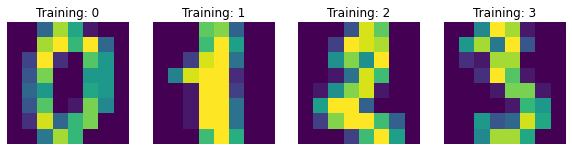

In [2]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image)
    ax.set_title('Training: %i' % label)

In [3]:
for i in range(3):
  print("=> Image", i + 1, ": ")
  print("- Matrix:", digits.images[i])
  print("- Size: ", digits.images[i].shape)
  print("- Min: ", np.min(digits.images[i]))
  print("- Max: ", np.max(digits.images[i]))

=> Image 1 : 
- Matrix: [[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
- Size:  (8, 8)
- Min:  0.0
- Max:  15.0
=> Image 2 : 
- Matrix: [[ 0.  0.  0. 12. 13.  5.  0.  0.]
 [ 0.  0.  0. 11. 16.  9.  0.  0.]
 [ 0.  0.  3. 15. 16.  6.  0.  0.]
 [ 0.  7. 15. 16. 16.  2.  0.  0.]
 [ 0.  0.  1. 16. 16.  3.  0.  0.]
 [ 0.  0.  1. 16. 16.  6.  0.  0.]
 [ 0.  0.  1. 16. 16.  6.  0.  0.]
 [ 0.  0.  0. 11. 16. 10.  0.  0.]]
- Size:  (8, 8)
- Min:  0.0
- Max:  16.0
=> Image 3 : 
- Matrix: [[ 0.  0.  0.  4. 15. 12.  0.  0.]
 [ 0.  0.  3. 16. 15. 14.  0.  0.]
 [ 0.  0.  8. 13.  8. 16.  0.  0.]
 [ 0.  0.  1.  6. 15. 11.  0.  0.]
 [ 0.  1.  8. 13. 15.  1.  0.  0.]
 [ 0.  9. 16. 16.  5.  0.  0.  0.]
 [ 0.  3. 13. 16. 16. 11.  5.  0.]
 [ 0.  0.  0.  3. 11. 16.  9.  0.]]
- S

- Sau khi đọc thử một vài ảnh, nhóm em nhận thấy:
  + Ảnh là các ma trận 8x8
  + Các phần tử trong mỗi ảnh trong khoảng [1, 16]
- Nhóm em tiến hành chuyển chúng về trong khoảng [0, 1] để lúc sau phân loại chính xác hơn

In [4]:
for x in digits.images:
   x /= np.max(x)

for i in range(3):
  print("=> Image", i + 1, ": ")
  print("- Matrix:", digits.images[i])

=> Image 1 : 
- Matrix: [[0.         0.         0.33333333 0.86666667 0.6        0.06666667
  0.         0.        ]
 [0.         0.         0.86666667 1.         0.66666667 1.
  0.33333333 0.        ]
 [0.         0.2        1.         0.13333333 0.         0.73333333
  0.53333333 0.        ]
 [0.         0.26666667 0.8        0.         0.         0.53333333
  0.53333333 0.        ]
 [0.         0.33333333 0.53333333 0.         0.         0.6
  0.53333333 0.        ]
 [0.         0.26666667 0.73333333 0.         0.06666667 0.8
  0.46666667 0.        ]
 [0.         0.13333333 0.93333333 0.33333333 0.66666667 0.8
  0.         0.        ]
 [0.         0.         0.4        0.86666667 0.66666667 0.
  0.         0.        ]]
=> Image 2 : 
- Matrix: [[0.     0.     0.     0.75   0.8125 0.3125 0.     0.    ]
 [0.     0.     0.     0.6875 1.     0.5625 0.     0.    ]
 [0.     0.     0.1875 0.9375 1.     0.375  0.     0.    ]
 [0.     0.4375 0.9375 1.     1.     0.125  0.     0.    ]
 [0.    

#### **4.2.2. Chia bộ dữ liệu và training**

- Sau khi tham khảo trên các trang thì nhóm em tiến hành:
  + Chia bộ dữ liệu theo tỉ lệ: 80% train, 20% test
  + Chọn tham số gần như tốt cho SVC là: C = 10; gamma = 0.1; kernel = 'rbf'
- Sau khi training nhận được kết quả cũng khá khả quan: ***96%***


In [5]:
# flatten the images
n_samples = len(digits.images)

data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
clf = svm.SVC(C = 10, gamma = 0.1, kernel = 'rbf')

# Split data into 80% train and 20% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.2, shuffle=False)

# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

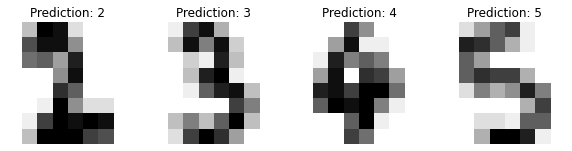

In [6]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}')

Classification report for classifier SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        35
           1       0.95      1.00      0.97        36
           2       1.00      1.00      1.00        35
           3       1.00      0.86      0.93        37
           4       0.97      0.92      0.94        37
           5       0.93      1.00      0.96        37
           6       1.00      1.00      1.00        37
           7       0.95      1.00      0.97        36
           8       0.88      0.91      0.90        33
           9       0.92      0.92      0.92        37

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg 

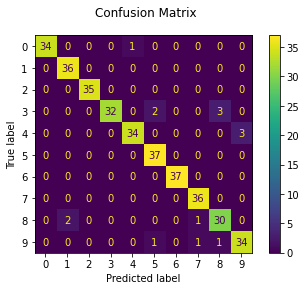

In [7]:
print(f"Classification report for classifier {clf}:\n"
      f"{metrics.classification_report(y_test, predicted)}\n")

disp = metrics.plot_confusion_matrix(clf, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

#### **4.2.3. Đọc dữ liệu từ máy ảnh**

In [8]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

#### **4.2.4. Xử lí ảnh**

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageOps

def getBlackWhiteImage(input, output):
    image = cv2.imread(input)
    image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image_blur = cv2.GaussianBlur(image_gray, (5, 5), 0)
    ret, ostu_thresh = cv2.threshold(image_blur, 127, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    plt.figure(figsize=(16,8))
    plt.subplot(1, 4, 1)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.title("Image original")
    plt.subplot(1, 4, 2)
    plt.imshow(image_gray, cmap=plt.cm.binary)
    plt.title("Image gray")
    plt.subplot(1, 4, 3)
    plt.imshow(image_blur, cmap=plt.cm.binary)
    plt.title("Image blur")
    plt.subplot(1, 4, 4)
    plt.imshow(ostu_thresh, cmap=plt.cm.binary)
    plt.title("Text: White, Background: Black")
    plt.show() 
    cv2.imwrite(output, ostu_thresh)
    return

def convertWhiteBlackImage(input, output):
    image = Image.open(input)
    image_result = ImageOps.invert(image)
    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.title("Text: White, Background: Black")
    plt.subplot(1, 2, 2)
    plt.imshow(image_result, cmap=plt.cm.binary)
    plt.title("Text: Black, Background: White")
    plt.show()
    image_result.save(output)
    return

def getResult(input):
    image = cv2.imread(input, cv2.IMREAD_GRAYSCALE)
    image_8_8 = cv2.resize(image, (8, 8), interpolation = cv2.INTER_AREA)
    image_8_8 = image_8_8 / np.max(image_8_8)
    image_predict = image_8_8.reshape(1, 64)
    plt.figure(figsize=(12, 12))
    plt.subplot(1, 3, 1)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.title("Text: Black, Background: White")
    plt.subplot(1, 3, 2)
    plt.imshow(image_8_8, cmap=plt.cm.binary)
    plt.title("Image 8x8")
    result = clf.predict(image_predict)[0]
    plt.subplot(1, 3, 3)
    plt.imshow(image_8_8, cmap=plt.cm.binary)
    plt.title(f"Prediction: {result}")
    plt.show()
    print("Result: ", result)
    return

#### **4.2.5. Thử nghiệm với những ảnh đã có sẵn**

In [10]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


Test: 0 - Images: 0.jpg


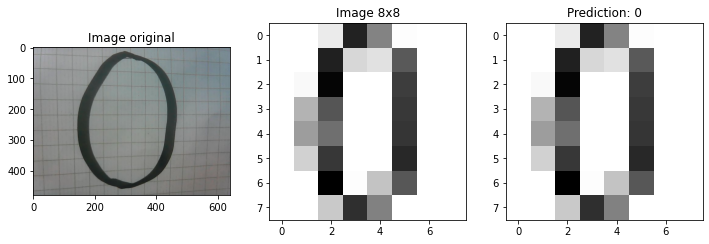

Result:  0

Test: 1 - Images: 1.jpg


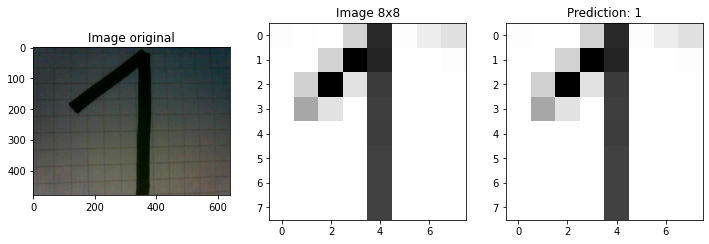

Result:  1

Test: 2 - Images: 2.jpg


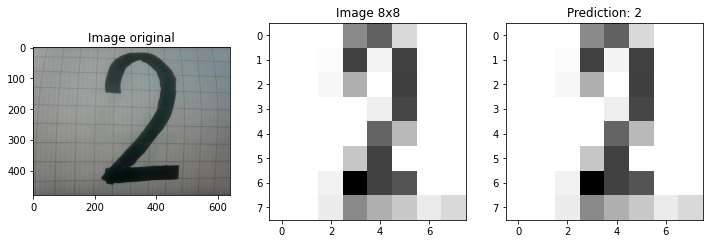

Result:  2

Test: 3 - Images: 3.jpg


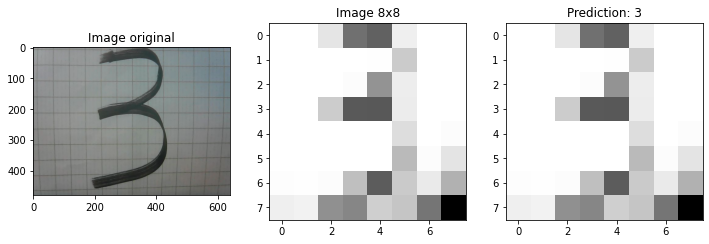

Result:  3

Test: 4 - Images: 4.jpg


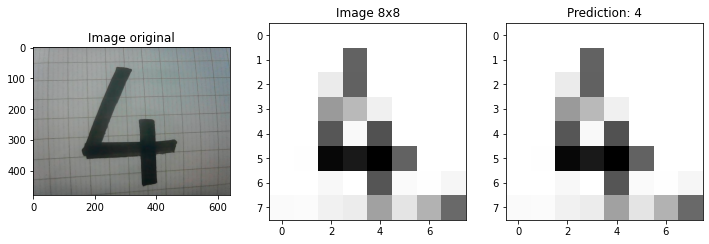

Result:  4

Test: 5 - Images: 5.jpg


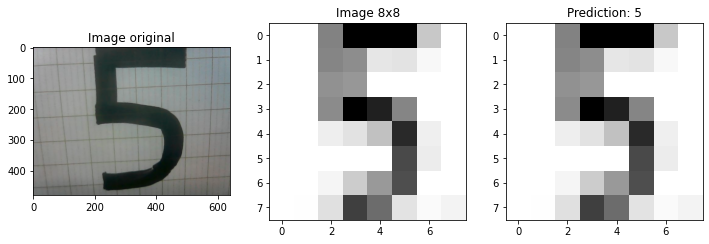

Result:  5

Test: 6 - Images: 6.jpg


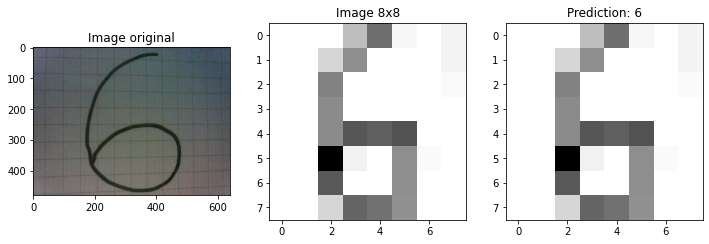

Result:  6

Test: 7 - Images: 7.jpg


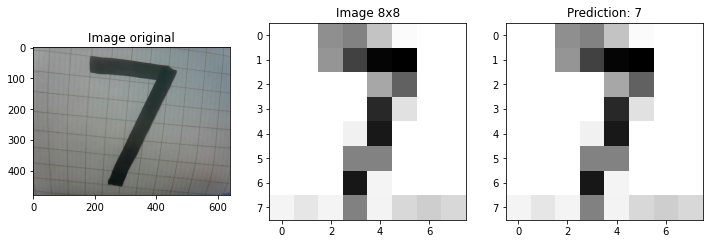

Result:  7

Test: 8 - Images: 8.jpg


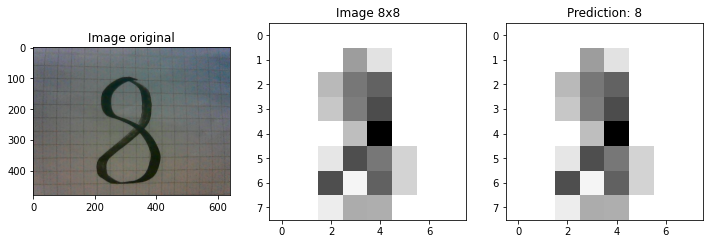

Result:  8

Test: 9 - Images: 9.jpg


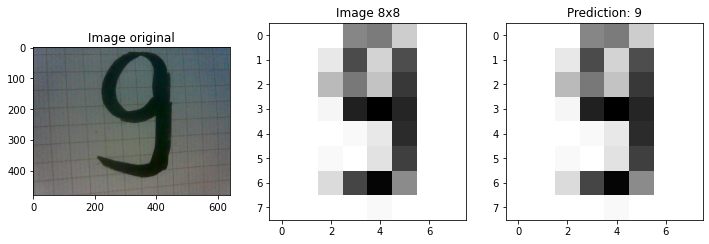

Result:  9



In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageOps
import os

def getBlackWhiteImageTest(input, output):
    image = cv2.imread(input)
    image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image_blur = cv2.GaussianBlur(image_gray, (5, 5), 0)
    ret, ostu_thresh = cv2.threshold(image_blur, 127, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    cv2.imwrite(output, ostu_thresh)
    return

def convertWhiteBlackImageTest(input, output):
    image = Image.open(input)
    image_result = ImageOps.invert(image)
    image_result.save(output)
    return

def getResultTest(input, input_original):
    image_original = cv2.imread(input_original)
    image = cv2.imread(input, cv2.IMREAD_GRAYSCALE)
    image_8_8 = cv2.resize(image, (8, 8), interpolation = cv2.INTER_AREA)
    image_8_8 = image_8_8 / np.max(image_8_8)
    image_predict = image_8_8.reshape(1, 64)
    plt.figure(figsize=(12, 12))
    plt.subplot(1, 3, 1)
    plt.imshow(image_original, cmap=plt.cm.binary)
    plt.title("Image original")
    plt.subplot(1, 3, 2)
    plt.imshow(image_8_8, cmap=plt.cm.binary)
    plt.title("Image 8x8")
    result = clf.predict(image_predict)[0]
    plt.subplot(1, 3, 3)
    plt.imshow(image_8_8, cmap=plt.cm.binary)
    plt.title(f"Prediction: {result}")
    plt.show()
    print("Result: ", result)
    print("===========================================\n")

dir_test_folder = "/content/drive/MyDrive/Colab Notebooks/CS114.L21/Images/Handwritten-digits/"

file_images = os.listdir(dir_test_folder)
file_images.sort()

i = 0

for file_image in file_images:
    print("Test:",i,"- Images:",file_image)
    i += 1
    file_image = dir_test_folder + file_image
    image_text_black = "temp_b.jpg"
    image_text_white = "temp_w.jpg"
    getBlackWhiteImageTest(file_image, image_text_black)
    convertWhiteBlackImageTest(image_text_black, image_text_white)
    getResultTest(image_text_white, file_image)
    os.remove(image_text_black)
    os.remove(image_text_white)

#### **4.2.6. Nhận dạng từ máy ảnh**

<IPython.core.display.Javascript object>

STEP 1: Convert to Text: White, Background: Black


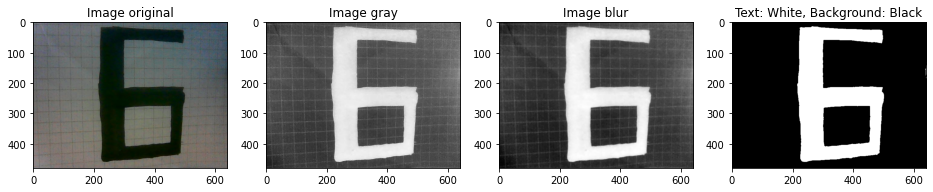

STEP 2: Convert to Text: Black, Background: White


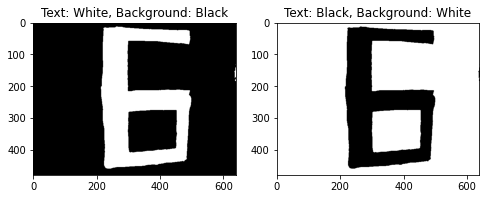

STEP 3: Get result


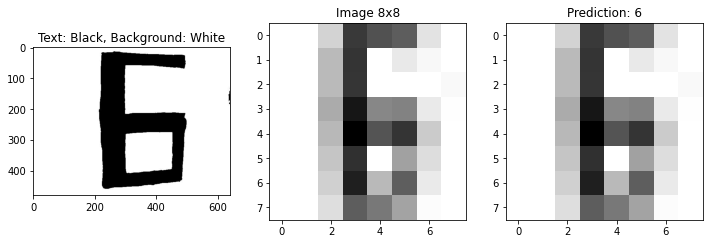

Result:  6


In [21]:
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import os

try:
  image = take_photo()
  image_text_black = "temp_b.jpg"
  image_text_white = "temp_w.jpg"
  print("STEP 1: Convert to Text: White, Background: Black")
  getBlackWhiteImage(image, image_text_black)
  print("STEP 2: Convert to Text: Black, Background: White")
  convertWhiteBlackImage(image_text_black, image_text_white)
  print("STEP 3: Get result")
  getResult(image_text_white)
  #Delete_temp
  os.remove(image_text_black)
  os.remove(image_text_white)

except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

## **5. TRẢ LỜI YÊU CẦU ĐỀ BÀI**

- Kết quả chạy thực tế với webcam của laptop và giấy viết tay của các bạn có tốt không?
  + Kết quả chạy thực tế với webcam của laptop và giấy viết tay: Tốt
- Nhìn vào đâu để kết luận là tốt hay không?
  + Nhìn vào kết quả thu được so với kết quả mong muốn ban đầu những vẫn còn vài hạn chế
- Nếu không tốt thì lý do tại sao?
  + Chữ số viết tay không đủ rõ
  + Ảnh có độ sáng tối không đồng đều
  + Ảnh sau khi resize về 8x8 thì vẫn chưa tốt ở vài điểm nên model phân loại chưa chính xác nhất
- Nếu tốt thì tiếp theo có thể dùng model digits recognition này vào các bài toán phức tạp hơn như nhận dạng biển số nhà không?
  + Do dataset ban đầu có kích thước mỗi ảnh chỉ 8x8 nên nếu ứng dụng vào các bài toán phức tạp hơn như nhận diện biển số nhà thì không nhận được độ chính xác cao như mong muốn